# House Power Consumption Dataset


## ⛑️⛑️⛑️⛑️⛑️⛑️⛑️⛑️⛑️⛑️⛑️⛑️⛑️⛑️⛑️⛑️⛑️⛑️⛑️⛑️⛑️⛑️⛑️⛑️⛑️⛑️⛑️⛑️⛑️
Please make sure to execute the file ./download_data.py or download it manually from 
> https://archive.ics.uci.edu/static/public/235/individual+household+electric+power+consumption.zip

## Import Libraries


In [34]:
from numpy import nan
from pandas import read_csv
from matplotlib import pyplot as plt


## Dataset description


This dataset is located here: ../data/electric_power_consumption/

- global_active_power: The total active power consumed by the household (kilowatts).
- global_reactive_power: The total reactive power consumed by the household (kilowatts).
- voltage: Average voltage (volts).
- global_intensity: Average current intensity (amps).
- sub_metering_1: Active energy for kitchen (watt-hours of active energy).
- sub_metering_2: Active energy for laundry (watt-hours of active energy).
- sub_metering_3: Active energy for climate control systems (watt-hours of active energy).


### load all data


In [35]:
dataset_path = "../data/electric_power_consumption/household_power_consumption.txt"
dataset = read_csv(
    dataset_path,
    sep=";",
    header=0,
    low_memory=False,
    infer_datetime_format=True,
    parse_dates={"datetime": [0, 1]},
    index_col=["datetime"],
)
updated_dataset_path = (
    "../data/electric_power_consumption/updated_household_power_consumption.csv"
)


/var/folders/sg/wpp92q5907g1lfl4pryzq8740000gn/T/ipykernel_37566/3656299432.py:2: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  dataset = read_csv(
/var/folders/sg/wpp92q5907g1lfl4pryzq8740000gn/T/ipykernel_37566/3656299432.py:2: UserWarning: Parsing dates in %d/%m/%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  dataset = read_csv(


In [36]:
# summarize
print("Dataset shape: {}".format(dataset.shape))
print(f"Dataset shape: {dataset.head()}")


Dataset shape: (2075259, 7)
Dataset shape:                     Global_active_power Global_reactive_power  Voltage  \
datetime                                                                 
2006-12-16 17:24:00               4.216                 0.418  234.840   
2006-12-16 17:25:00               5.360                 0.436  233.630   
2006-12-16 17:26:00               5.374                 0.498  233.290   
2006-12-16 17:27:00               5.388                 0.502  233.740   
2006-12-16 17:28:00               3.666                 0.528  235.680   

                    Global_intensity Sub_metering_1 Sub_metering_2  \
datetime                                                             
2006-12-16 17:24:00           18.400          0.000          1.000   
2006-12-16 17:25:00           23.000          0.000          1.000   
2006-12-16 17:26:00           23.000          0.000          2.000   
2006-12-16 17:27:00           23.000          0.000          1.000   
2006-12-16 17:28:0

### Mark all missing values as nan


In [37]:
dataset.replace("?", nan, inplace=True)


### Add a column for the remainder of `sub metering`


In [38]:
values = dataset.values.astype("float32")
dataset["sub_metering_4"] = (values[:, 0] * 1000 / 60) - (
    values[:, 4] + values[:, 5] + values[:, 6]
)


### Save updated dataset


In [39]:
dataset.to_csv(updated_dataset_path)


### Load the new dataset and summarize


In [40]:
df = read_csv(
    updated_dataset_path,
    header=0,
    infer_datetime_format=True,
    parse_dates=["datetime"],
    index_col=["datetime"],
)


/var/folders/sg/wpp92q5907g1lfl4pryzq8740000gn/T/ipykernel_37566/4137735132.py:1: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df = read_csv(


In [41]:
print("Dataset shape: {}".format(dataset.shape))
print(f"Dataset shape: {dataset.head()}")


Dataset shape: (2075259, 8)
Dataset shape:                     Global_active_power Global_reactive_power  Voltage  \
datetime                                                                 
2006-12-16 17:24:00               4.216                 0.418  234.840   
2006-12-16 17:25:00               5.360                 0.436  233.630   
2006-12-16 17:26:00               5.374                 0.498  233.290   
2006-12-16 17:27:00               5.388                 0.502  233.740   
2006-12-16 17:28:00               3.666                 0.528  235.680   

                    Global_intensity Sub_metering_1 Sub_metering_2  \
datetime                                                             
2006-12-16 17:24:00           18.400          0.000          1.000   
2006-12-16 17:25:00           23.000          0.000          1.000   
2006-12-16 17:26:00           23.000          0.000          2.000   
2006-12-16 17:27:00           23.000          0.000          1.000   
2006-12-16 17:28:0

## Patern in Observation over time

### Line Visualization

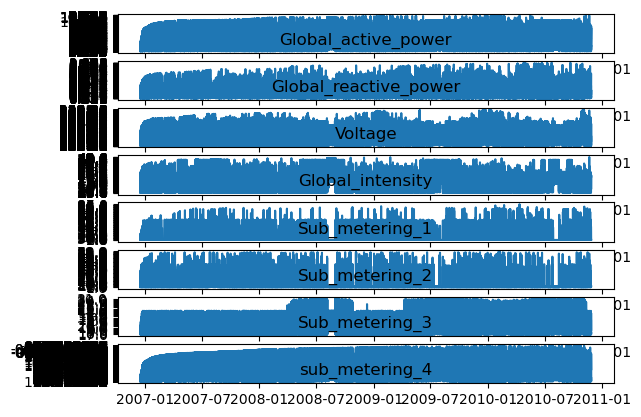

In [42]:
plt.figure()
for i in range(len(df.columns)):
    plt.subplot(len(df.columns), 1, i+1)
    name = df.columns[i]
    plt.plot(df[name].astype(str))
    plt.title(name, y=0)
plt.show()


## Time Series Data Distributions

### Histogram for distribution observation

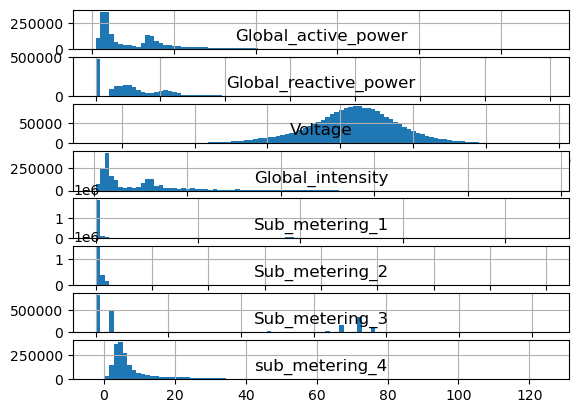

In [65]:
plt.figure()
for i in range(len(df.columns)):
 plt.subplot(len(df.columns), 1, i+1)
 name = df.columns[i]
 df[name].hist(bins=100)
 plt.title(name, y=0)
plt.show()


### plot active power for each year